## Fake News Detector - Notebook 3

In this notebook I investigate the top 5 keywords associated with fake news based on the article title and text.

I also investigate the average title and text length for both real and fake news articles.

In [76]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

#import natural language processing libraries
#nltk = natural language toolkit

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [77]:
uploaded = files.upload()

In [78]:
data = pd.read_csv("cleaned_dataset.csv")

In [79]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


## Section 1: Keyword investigation

In [80]:
import nltk
nltk.download("stopwords")

#split lonng text into words
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
#retrieving english stopwards
stop_words = set(stopwords.words("english"))

print(stop_words)

{'am', 'an', 'so', 'from', 'ain', 'which', 'very', 'of', 'after', 'when', 'your', 'before', 'about', 'he', 'any', 'o', 'here', 'both', 'over', 'wasn', 'own', 'then', "didn't", 'doing', 'where', 'isn', 'there', "wasn't", 'ourselves', 'during', 'while', 'didn', 'she', 'hadn', 'shan', 'but', 'doesn', 'yourselves', "weren't", "it's", 'how', 'our', 'we', 'wouldn', 'herself', 'their', "you'll", 'her', 'now', "that'll", 'was', 'until', 'too', "wouldn't", 'through', "isn't", 'itself', 'the', "you'd", "you've", 'being', 'because', 'in', 'yours', 't', 'what', 'with', 'against', 'off', 'aren', "haven't", 'just', 'i', 'is', 'than', 've', 'they', 'me', 'and', 'under', 'mustn', "mightn't", 'all', 'my', 'theirs', 'same', 'do', 'been', "doesn't", "she's", 'did', 's', 'ma', 're', 'd', 'himself', 'does', 'few', 'for', 'more', 'themselves', 'not', "hasn't", 'its', 'needn', 'you', 'couldn', 'him', 'other', 'on', 'hers', 'once', 'only', 'shouldn', 'to', 'have', "needn't", "won't", 'up', 'don', 'them', 'as'

In [82]:
title_counter = Counter()
text_counter = Counter()


The for loop iterates through the data, preprocesses the text data by tokenizing and removing stop words, and then updates counters for word occurrences in fake news articles.

In [83]:


for index, row in data.iterrows():

  title_words = word_tokenize(row["title"])
  text_words = word_tokenize(row["text"])

  #remove stopwords (the, is, and) as stopwords will skew the data as they apppear frequently in text.

  title_words = (word.lower() for word in title_words if word.isalpha() and word.lower() not in stop_words)
  text_words = (word.lower() for word in text_words if word.isalpha() and word.lower() not in stop_words)

  #only include rows for fake news articles
  if row["label"] == "Fake":
    title_counter.update(title_words)
    text_counter.update(text_words)

In [84]:
#display the top 5 key words associated with fake news for title
top_keywords_title = title_counter.most_common(5)

#display the top 5 key words associated with fake news for text
top_keywords_text = text_counter.most_common(5)


In [85]:
print(top_keywords_title)

[('trump', 135), ('hillary', 129), ('clinton', 121), ('title', 91), ('us', 59)]


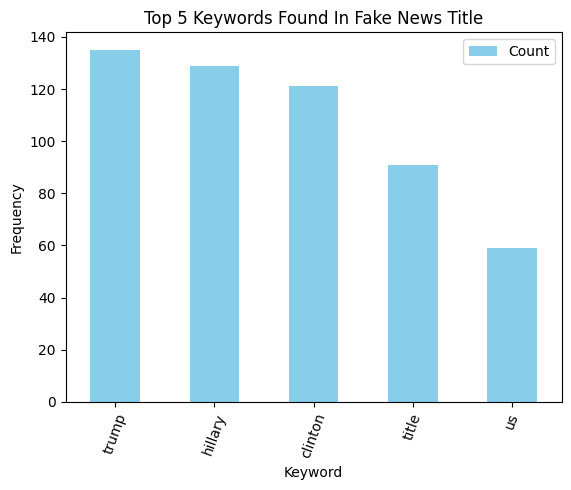

In [86]:
# Create a bar chart to view the top 5 keywords by frequency
df_title = pd.DataFrame(top_keywords_title, columns=['Keyword', 'Count'])

df_title.plot(kind='bar', x='Keyword', y='Count', color='skyblue')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 5 Keywords Found In Fake News Title')
plt.xticks(rotation=70)
plt.show()

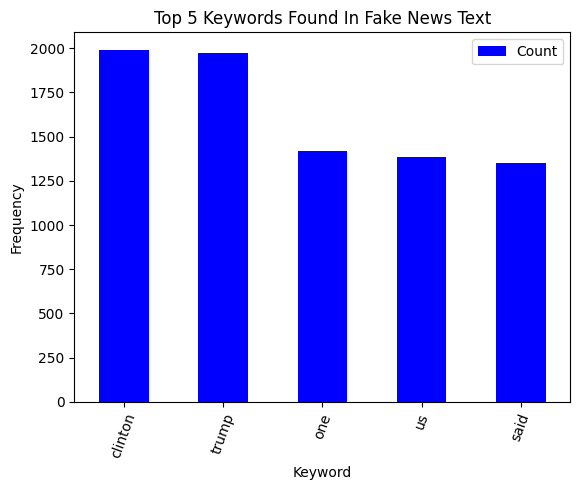

In [87]:
# Create a bar chart to view the top 5 keywords by frequency
df_text = pd.DataFrame(top_keywords_text, columns=['Keyword', 'Count'])

df_text.plot(kind='bar', x='Keyword', y='Count', color='blue')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 5 Keywords Found In Fake News Text')
plt.xticks(rotation=70)
plt.show()

By analysing the data it is clear that fake news articles are often focussed on political topics. This conclusion is drawn from the high frequency of the keywords 'Clinton', 'Trump' and 'Hilary' in either the title or article body.

## Investigating Title and Text Length

In this section we will determine the average title and text length for both fake and real news articles.

In [88]:
#create a new column title_length and text_length to store title and text length

data["title_length"] = data["title"].apply(len)
data["text_length"] = data["text"].apply(len)

In [89]:
#extract only the real news data
real_news = data[data["label"]=="Real"]

#extract only the fake news data
fake_news = data[data["label"]=="Fake"]

In [100]:
avg_real_title_length = real_news["title_length"].mean()
avg_fake_title_length = fake_news["title_length"].mean()

avg_real_text_length = real_news["text_length"].mean()
avg_fake_text_length = fake_news["text_length"].mean()


In [101]:
textdata = [
    {"News Type": "Real", "Average Text Length": avg_real_text_length},
    {"News Type": "Fake", "Average Text Length": avg_fake_text_length}
]

# Create a DataFrame from the data
textdataset = pd.DataFrame(textdata)
print(textdataset)

  News Type  Average Text Length
0      Real          3209.137931
1      Fake          2843.218579


(array([0, 1]), [Text(0, 0, 'Real'), Text(1, 0, 'Fake')])

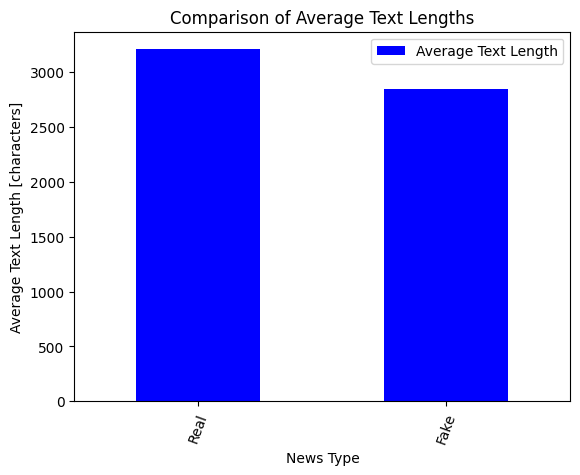

In [102]:
# Create the bar chart
textdataset.plot(kind='bar', x='News Type', y='Average Text Length', color= 'blue')

# Add labels and title
plt.xlabel('News Type')
plt.ylabel('Average Text Length [characters]')
plt.title('Comparison of Average Text Lengths')
plt.xticks(rotation=70)


In [103]:
title_len = [
    {"News Type": "Real", "Average Title Length": avg_real_title_length},
    {"News Type": "Fake", "Average Title Length": avg_fake_title_length}
]

In [105]:
titledata = [
    {"News Type": "Real", "Average Title Length": avg_real_title_length},
    {"News Type": "Fake", "Average Title Length": avg_fake_title_length}
]

# Create a DataFrame from the data
titledataset = pd.DataFrame(titledata)
print(titledataset)

  News Type  Average Title Length
0      Real             56.673740
1      Fake             65.070258


(array([0, 1]), [Text(0, 0, 'Real'), Text(1, 0, 'Fake')])

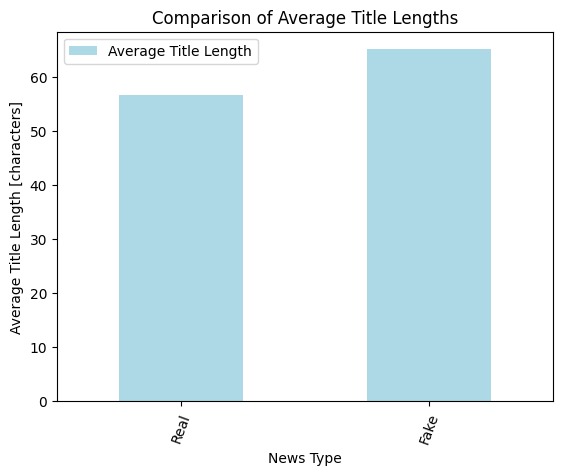

In [99]:
# Create the bar chart
titledataset.plot(kind='bar', x='News Type', y='Average Title Length', color= 'lightblue')

# Add labels and title
plt.xlabel('News Type')
plt.ylabel('Average Title Length [characters]')
plt.title('Comparison of Average Title Lengths')
plt.xticks(rotation=70)


We can conclude from these findings that fake news articles typically have longer titles yet shorter article lengths.